<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Transfer_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [ ]:
import tensorflow as tf

import matplotlib.pylab as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Download the classifier

In [ ]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224

model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape = (IMAGE_RES, IMAGE_RES, 3) )
])

## Run it on a Single Image

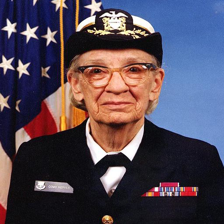

In [ ]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize((IMAGE_RES, IMAGE_RES))
grace_hopper

## Normalize image

In [ ]:
grace_hopper = np.array(grace_hopper)
grace_hopper.shape

(224, 224, 3)

In [ ]:
grace_hopper

array([[[ 25,  28,  82],
        [ 29,  31,  91],
        [ 27,  28,  95],
        ...,
        [ 73, 111, 185],
        [ 69, 107, 182],
        [ 70, 108, 183]],

       [[ 28,  31,  85],
        [ 27,  29,  90],
        [ 27,  28,  94],
        ...,
        [ 77, 114, 187],
        [ 81, 118, 191],
        [ 80, 117, 190]],

       [[ 27,  30,  84],
        [ 28,  30,  90],
        [ 30,  31,  97],
        ...,
        [ 85, 121, 192],
        [ 80, 117, 188],
        [ 83, 120, 191]],

       ...,

       [[160,  10,  23],
        [161,  14,  24],
        [151,  18,  22],
        ...,
        [ 11,  10,  16],
        [ 12,  11,  17],
        [ 12,  11,  17]],

       [[161,  14,  28],
        [156,  14,  22],
        [146,  19,  20],
        ...,
        [ 13,  12,  18],
        [ 16,  15,  21],
        [ 13,  12,  18]],

       [[155,  14,  26],
        [154,  18,  24],
        [141,  20,  19],
        ...,
        [ 12,  11,  17],
        [ 13,  12,  18],
        [ 13,  12,  18]]

In [ ]:
grace_hopper = grace_hopper / 255.0
grace_hopper.shape

(224, 224, 3)

In [ ]:
grace_hopper

array([[[0.09803922, 0.10980392, 0.32156863],
        [0.11372549, 0.12156863, 0.35686275],
        [0.10588235, 0.10980392, 0.37254902],
        ...,
        [0.28627451, 0.43529412, 0.7254902 ],
        [0.27058824, 0.41960784, 0.71372549],
        [0.2745098 , 0.42352941, 0.71764706]],

       [[0.10980392, 0.12156863, 0.33333333],
        [0.10588235, 0.11372549, 0.35294118],
        [0.10588235, 0.10980392, 0.36862745],
        ...,
        [0.30196078, 0.44705882, 0.73333333],
        [0.31764706, 0.4627451 , 0.74901961],
        [0.31372549, 0.45882353, 0.74509804]],

       [[0.10588235, 0.11764706, 0.32941176],
        [0.10980392, 0.11764706, 0.35294118],
        [0.11764706, 0.12156863, 0.38039216],
        ...,
        [0.33333333, 0.4745098 , 0.75294118],
        [0.31372549, 0.45882353, 0.7372549 ],
        [0.3254902 , 0.47058824, 0.74901961]],

       ...,

       [[0.62745098, 0.03921569, 0.09019608],
        [0.63137255, 0.05490196, 0.09411765],
        [0.59215686, 0

## Predict Model

In [ ]:
result = model.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
result[0]

array([ 0.19971314,  1.0666505 , -0.10109201, ...,  0.1568839 ,
       -0.6055862 , -0.04497601], dtype=float32)

In [ ]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

## Decode the prediction

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# for i in imagenet_labels:
#   print(i)
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

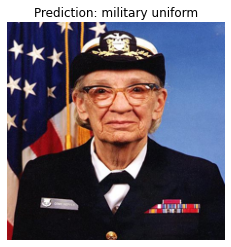

In [ ]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_=plt.title("Prediction: "+predicted_class_name)

In [ ]:
dog_image = tf.keras.la('https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.theguardian.com%2Fscience%2F2019%2Fjun%2F17%2Fhow-dogs-capture-your-heart-evolution-puppy-dog-eyes&psig=AOvVaw0OvM7E7C-OY9Yp3-qLCfbE&ust=1613287752852000&source=images&cd=vfe&ved=2ahUKEwimitqsq-buAhUj-zgGHTCtDqoQjRx6BAgAEAc')

## Try with another example of GoldFish

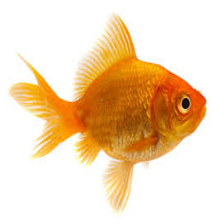

In [ ]:
# dog_image = tf.keras.utils.get_file('3408.jpeg', 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.theguardian.com%2Fscience%2F2019%2Fjun%2F17%2Fhow-dogs-capture-your-heart-evolution-puppy-dog-eyes&psig=AOvVaw0OvM7E7C-OY9Yp3-qLCfbE&ust=1613287752852000&source=images&cd=vfe&ved=2ahUKEwimitqsq-buAhUj-zgGHTCtDqoQjRx6BAgAEAc')
gold_fish = tf.keras.utils.get_file('Goldfish-Image-1024x694.jpg', 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxQSEhUSExIVFhUXFxYVFhcVFRcXFhYaGBcWGBUYGBcYHSggGBolGxcXIjEiJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGzUlICUtLS8vLS0tLS0tLS0tLS0tLS8tLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALkBEQMBEQACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EADsQAAIBAgMFBQcDAgUFAAAAAAABAgMRBCExBRJBUWEGcYGRoSIyscHR4fATQlJi8RQjU5KiB3KCg7L/xAAaAQEAAwEBAQAAAAAAAAAAAAAAAgMEAQUG/8QANhEAAgECBAIIBgIABwEAAAAAAAECAxEEEiExQVEFEyJhcYGRoTJCsdHh8FLBBhQjYoKS8TP/2gAMAwEAAhEDEQA/APuIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABrq1LEXJI6lciSx1nZ8dDPKvldnx2LVTurknD4hTV13NcU+TLqVWNRXj/AOFc4OLszcWEQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADxs43YEDGVba6c+Rjq1MvxbczRTjfbcqsRUtlLOL0fIx1J5OxPWL48jRGObtR3IksZOlPej7y1XCceT6pcTz6mIqUKuaPxL0ku/vXBmiNKFWOV7P2f25nT7Pxsa0FODyfDinxT6n0WHxEK9NVIbfQ8ytSlSm4SJJeVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHjZxtIGmvVstLroU1JtK9ronGNyrr1uK9qL4cV9jFKeVXjrF+xpjG+j0ZXVpJey84vTp9jFUkodh6xexoir9pbogVW81+6Ga6rijBPNK8Pmjqu9cjRGy14Mz2Tjv0KsZp/5VXVfxf2+BPBYj/K1IyT/ANOfs/x9CWIpdfTcX8UfdHbpn1p4J6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeNnG7Aj163Kz6FFSUn8OpZGPMramIz9l2fGL/PgYet17Ds+T/foaVDTXbmQa9XWUVmvejz6/cz1ZuzqU1qt1z/AHmWxXyy8mQa01lxhLNPinx8Tz6slonrCWz5M0RXqjRVb1/fDj/JFFScvi+eHuiyKW3B+zI9Ze9FaSX6sekl76Xhf0OStKLitpLMvFbr0uWQbTUnutH/AEdd2Yx/6tFJ+9D2X8n5H0nReK6+gr7rRnk46j1VXTZ6lwekYwAAAAAAAAAAAAAAAAAAAAAAYVJNZpX6EJNrVK51JMUqqkrp/bvEJqSug4tbmZM4AAAAAAAAAADCU7HGwRMRi7cbeGRnqVEt3YuhC5XYmvxl/uj8zHVmlrP/ALL+y+C/j6MrcbVej74yPKxlSS0l5M1UYrdeaIdPESvfitVzMMMTUzKUd+K5l8qcbWZ7Oev8Xw5MlOommk+y/ZnFHnuiLOtbXVZMxyqO6UuGhco8iO8Ulu5+7K67uK9EdhVatbg7k+rvfvLPsjtCMK27fKd4+OTj8GvE9foetGnWyfyv+DP0hRlOlm5frO7ufVHggAAAAAAAAAAAAAAAAAAAAAAAEevh7+1F7sua495TUpX1joyyM7aPVEentCz3ai3Xz4ePL4GZY1Qlkrad/D8fQsdC6zQ1J6ZvTM56AAAAAAAYzdkcbsCtxNZ8r9zM9ST5XLoRXMr5V75KWf8AGX5cxutd2hLXkzQoW3XmiHOtm7ZPjF6PuMM6yu1HR8Y8/AvjDTXbmRpzy0vHiuMWYZ1E42SvHlxiy5R17/qRatdRWq5p/IxOplWWPDZl8YOTK3E7RveyK5Rc5XZohQtuRf1XLVsZUi5RithGlzYcjt0ifRpxyT16ZZlLlJO6IOTsXNDbFWGSqXSX7rS9Xn6m+l0zjIfNfxRhng6Mvl9CZT7TVeMIS45Nx+uZuh/iKovjgvL9ZQ+jafCTXv8AYkx7VR/dSkue7JO3TO2Zrp/4hpP4oNej+xU+i5fLL1/WTcL2goTdt/dfKfs+ryv4no0eksNW0jL10M9TAV6au43XdqWqN5jAAAAAAAAAAAAAAAAAAABHxeFjUVmijEYeFaOWSLKdSUHdHPxxtTCz3Je1Dgun9L+R8xHFYjoyr1U+1Dh4dz/rbwPT6mniYZ46P93L/B46FVb0Hf4ro1wPpsPiqWIhmpu/1XieZVozpSyyRJNBWAAAACLjJtLJXKKknwLIJFHiatv2yXVPLyuebWqKO8Wu9amyEb8UyvrYi64TXTKSPNrYhTVvjXdpJGmFOz5fQjVK1lm7pc8pIwSraau/jpJFyhd6fgqsXti3u5vn068yCc5O7Zqhh+ZV1a7k82FFLYvWWK0Cl1FiLkzdSqWytcg4kW2bHiOi4Ech2x7/AIzjlqn4Dqjtje8dbVrw5PQh1QymEMd6fmh10jltDbHHXdueeS48CDpW1OZRUxMZXus+Lf5kFBrYthFrRGzC7frULfpyvH+E84+HFeB6uEx9ejpe65MjWwFGt8as+a0Z0ezO3FKVlWg6b5r2oeiuvI92j0tSlpPT6Hk1+hqsdabzezOnw2KhUjvQnGUecWmvQ9KE4zV4u6PJnTnTeWas+83EyAAAAAAAAAAAMZzSzZCU1FXZ1JvYh1dpxXBvyRknjox2TfsXxw8mRZbcS/Z/yX0Mk+lsvyX80WrBN/N7HsO0FPjGS8n8yuPT1H5oyXp9w8BU4NELbeLo1qfsy9taXTV+ib1KcdisLjKVoS7S2vp9S/CUqtGpqtH5nN4fHTpT3ouzXr0a4ng0K1TDVM0HZ/u561SjCtGz2O12PteFeOWUlrHiuq5o+zwWPp4qF1pLiv3gfP4nCzoS125lmbjKAAAVW0X/AEN+J59Z3+RvzNVLbcoMVNrSMl3NfU8bEScfhTXmjdTSe7RU4zGxgryV33Wfmmea3mequ/Cz9UbKdJy0Wxz+M2hKo827cFf48yShxepsjCMFpuRHW6klE45Gude33JKBA8WIfM7kQse/rvnoxkQseuvd5tZ5fU5ksdDqpvXp5BRaO3Nyrp5JZ246ZEcltzpup1ItPek7u26rOy53IOL4B6sTx6iks1JPz5ZhUW2WQim7s019oxT96/Plfw8CcaErbF8NSLLFXd9V0LVTsrFmRMk08UuD/O4qdNkkraMlYPHShLfpzlB84u3g+fcdp1KlF3g7M5UpU6scs1fxOw2N23s1DErL/Uiv/qPzXke5hOlc3Zq+p4OL6E+ah6P+mdrh68ZxUoSUovRp3TPZjJSV0eBOEoPLJWZsOkQAAAAAAAVu1E+tjzsUpcdjTQaKWpT/AKf+VjC6K4R9zXntx9jROhf9q/3fcyVMLm+Rf9vyWxq24+xGq4aS0hJdzPMrYScdqbXmaYVYv5iJUT4pmRwcd00XJ3I0pXVn9yeZyWpZHQwpV5QkpRlZrRrVE6dSUJKcXZotlCNSOWSO12D2hjWtCdo1OHKfdyfQ+r6P6TjX7FTSX18PsfP4zASo9qOsfp+8y+PXPOPGcYKbajTv7z7nZfE83ERTve787Gyi2uRyG1MXGCbtFdc5eXBs+cqrPLsxVuer/H1PWowb4/0cnXruT3nr04HIxS0R6LtFWRHqVeZYolbI86+engWqBBs1uTZKyRG5lEiwmjdlpYiDdTjpJLO7Wel7epF8iRhHeWaWStkd0OIm7l9FpZq2jja7/OpUdNtKG7aN1uzu1e102nbnllr0IS115ElbzKvalXdskrSWWeeenwNNFX1exoW2pX4bD2tnfv4vjfvNE53Dnd3JdWhuWdrdVK6fhzKYzzaF0JntCLit5vzz1+yYk1J2QnO8jfSxukYxV+pXKjxbK5YlJ2ibauI3cqicL6ZO3msjkabesNTsMUr2kTNn7WrUM6NSUUndxv7LtzXIupYmrTdouxLEYSlW+OPmdp2f7eRqS3MRu029JZqN+rb9nxyPZw/SGedp2R8/i+iJU45qV39Tt07nqHiHoAAAAAPGrnGr6MFdi9nJ5x8jHVwqesPQ00672kVNXCW1TXhH52PKq0Y/Nf0RsjUfD+zRPDw5z8N36mKeHovjLyy/cuVSfd7kOth+UKhinRv8MJ+ZfGfNohSoWekvFZFUabjJXT80W5yFiqNm7fdColGVjRTndEZTsc8DQrMt8F2kr08v1N5cp+166+pvpdJ4qnpmv46/kxVejaE9ctvAsl20lpKkn3Sa9Gmb4dOTt2oe5il0Ovll7FPtPtXKWkIr/ue9bwyXncrqdIyqbR9dfY0UujIx3k/LQ5jGY1ze9KTk+b/Ml0Mjcpu8mbIwUFliiHvkrBmLXE6itmuSyyS9dCa7yDRhKLXPrkdVjltDKlTz+5yTBLcrLJrS+fpcpSO2Moy1zWdsureqOtHTVGWabdrtp8E+jJW0OG6GISgopZu8Wnom3k0/I44Xdzl9zKyaab9uDeTvo1nbqnfzIa8NmTpu8kyq3t9uTd3e3mabZVZGipI8rVcrI7GOtyiTN1StvUksr31z4EVG07ltGZrx2IUoK101uReeWmtvMlSg4y9TjqaOxltGjLC4apiVH20oRg2r235KKlZ5ZX82i/CRVepllsefjJOlC63Oc7O9oMTLEU6dSrUrQqzUJwqSclaWTlFP3HH3sre7bQ9avh6SpOySsjyqNafWLU7GMbZX0yufMy3PtKcuwrnjhzFyWbU+qf8ATz9T/C/5je7vP9O+qjZZd172PoujZTlR7XPTwPlOmlSWI7G9tfE6g9E8gAAAAAAAGFSkmVzpqRJSaIdbCS/bL4fRmGph6q+GX76MujVjxRXYijJa1d387kefUzrSVW374I1QlF7QuVOLiv8AVb7o3POqzjf/AOzflc1wX+y3mV1SMW+D7k0zN2JNap+qZpi2u4h4jDck/H6kHB37Kdu80QqW3ZCnGxE0xncwsdJXIFZpvdeRojtdHJKyuiDi4qOjzL4a7lOZ8SPTm2yxpC5v3vz80IFTMZ6eSR1FfE8cVy5rzzOvcXM4Ttw6a8yLXecuYTrvitFZnVFcARXPrZrTpxyLrEUzdZLOTz1SuQ30R2/E1YiWWXHjf8sTitSNybhqLqU5VHJylmnzWXst87riUTllkorQnTkVWE4rxNNQuk9TyqmdiUzlY8hdXuGTpS0ZKhSirwqZKWV1+1/tduRDM9JR4HItJ2Z0OyNvQjTeGxVNThZwbspRlHk0cjKVOWan6bNHKuG61EGph8FSk3g6Di3e82pPJ6pSm20uisWVMXWqK0iOHwEacs0jGnPJq189fiY5I9HPc24SO9K70XAhPRWR2UrLQ+r9i6TVByd/all3JJHu9DQaouTe7PmelZp1rLgjoD2DzAAAAAAAAAAAYTpqWTSferkJ0oTVpK51Sa2IGM2ZSs3ZR7kvmYKvR+GSvZI008TVvbc5vE0d1vPLhkk/JHiVoune3lpZnpwkpakSbaXFGPrKyV2rL9/di9ZWVGKiZc92babIMr8yxWNCsyHi43z4l9N2LI2KjEwer04myElsZ6lO2xLw+67Zflip3uZnse3V/A4RTFaqr+J1RZEwlWsstbnVG71OMxnWajJ2XCXcTjBSZxkatVbT/qJRjY43Yjd+bv8ALItIPQSd0uPL6BIORmqT3XwzyvzFziJGGq2bcXa+V1x55ciFSnpqdpz1IkYbrvyuvBkr3Re3xLGjh1Lvs7FGfKyFTVEasrNJ8HnzLI66olSZOhgk43tm8u4odWzsSkewwk7pJb3JWt4OzDqQtd6EozaJ0sBZXqSV/wCMVZLvfEz9ff4V5sZzU6V3upW4Ek+LLIy0udV2S7M/qy35ZU083/J8l9T0cFgXXeafw/UwY3HdWssd/ofR6VNRSjFWS0SPpIxUUox2Pn5ScndmZI4AAAAAAAAAAAAV+0sUorW3xMGKrxhu7GmhTcnoc3iKrd2kor+Unm+6+p4lWrUknKCyr+Ut34XPRhCK0k79yKmpJy++h405Sm9Xc3xSiap0ym9mWxZHnhuhNTL1IkUuz1ap7tN25yyXrqb8PhMRV1jHTm9PqUVMdRp7y9Cux/Z+cZbrS77qxbUpVaLtI7DGU6kborsRs/cVvgUqrdkXZ7EDcXF8f7GjUqZ5kr5ajUHrlFuyTzWos0jh5iYLdavyt4E6crEJGmnhLuz0s/kWX3sRuKuEas/DT85cTqmiLRmsG7qNnpfTh/YKa3OG7ELd3U7WfpyucSVrDvPauy3F5aa5u2XHvJznlvGT1sRjraxU4uooSyzWmpynFzRqcrFjs/O27Kz5PLyZRVVt0QJmJwLk25LN5Ozs+/4FEK2VWRO9iZgouLSeb4q3qVTWfY5KRYVHLgitUHuQzI0f4OT4XfK5fGjO9iWdI6DYHZGc5KdZbkOX7n06HqYTouUnmqaLkZsRj4xVqerO+o0lFKMUklkktEfRRioqyPEbbd2ZnTgAAAAAAAAAAABGxUnb3lFcX+aGermau3lRZC19rspMTd5wj/7Kmngn8bHk1FJ60I/857eS/BuhppN/8V/ZSYqCu25Ocv5PKK882eLXhG7blnfN6RX3+hvptpbWXLiR1Su7JtvRZfBGLK5O0NWaMySuyzwPZ2pL3morjfOX0R6tDoOvPWpaK9WZKvSNKPw6v2OjwOxqVLNRvL+Us39j38N0ZhqGqjd82eXWxlWru7LkiRiq8YrP0La+KhTWpTTpuT0OS2tjL3UFLz+n1PnMVj87ywT9fse1QoW1lY5yvR3r3d3339Ty87vqb00VdfZ+rS/OhojWYaRCdN393S6+hoUlYqtqZ001ZuOjt4fUklxIyLOGDTycbWVrMspXz2lyM827aDD4eKVOyds763/tkWaKC9yN3d3MaqSumrpvPTPTLvKou25OzexDli4KV1HvV/TLSxG/avYtVGTRAxntu+nA7GWUujRtuba+IlJe1JyON5pXZKNOMdior0Y3soXbyzuzXTk92yE2mX2C2Zamr5y5a62tYhi8ytYzQmm2T8HQcfDRXzMfVZ9eJ2UrFksNfNkf8rO99jimi62T2YlUtKbcYeTl3LgurPWwvRspWc9EZa2LjHSOrOvwezaVJJQgl1tn4vU9unRhTXZVjzZ1Zz+JkstKwAAAAAAAAAAAAAeSONvgCvxlWMc37cuC4L6fE8/EYinS1l2pcuC/fU0UoSlotEUuLqSm7yz6aRX1PCxNedd3nquWyX3PRpQjTVl+TXQ2TOpwsubVl4Lico9G1sQ7vRc9l5Ldkp4qFPxL7AbJhT0V3zev2PosJgKOGXYWvN7nl1sTOrvtyLBKxtKD0Ah42i5LKMW+q+55eKoSm+xBPxX5LqU8r1ZzG0sLZ2k7v+MFkfP16Di7VJXf8YrQ9ijUuuyvNlVLCPil3LRd/Nmd0Wt1ry5eJoVTkexwl3ZK9/XuIwpOT01Z1zsrstX2QvC7tv67vDuue4uh59VdvtHnvpCOey2KTF7JylBrdkno73PL6icLqWjNiqJ9paoyjhrJKTvLjfNehoSsil7mqpSa922RK0mrxOacSmxGCm3n3lfU1DTGrBGmOzJNNrhrc71VQm8RFDDbKlJvpmzsqM+BF4lFhhtlr2HrzWnqShh3mTepROu7M1x2ZeSbtle1rX15cMupo2asQztqxYKhfL87yFRSm9WcirbFts7YU6lnuWXN5Lp3llHB1Kj20IVK8Ke71On2dsOFPOXtPuyXhxPVoYKMNZav2MNXFOWkdEWxuMoAAAAAAAAAAAAAAAAMZwuV1KedWudTsaP8FHkZlgKW7LOukZwwsFmoq/PV+bLoYWlB3jFEXUm92bi8gAAAADCpG5RWg5rc6mVmIwV3aEc3rJ/BHkvDO9qUfGTVvQ1wrW+J+RCqbOSySvzf8nyX1KKlCMeytf7fJGiOIb1f/hP2ZstQe/K29w5R7j0MDgOqfWVPi9kZsRiXNZY7fUtD1DIQto0ISXtxUu+1/BmevTpzVpq5bSlOL7Lsc3i9n087OcfKS+N/U8urhaPBte6N0K9TjZ+xU4nCqGcZ+UWrmGdJQ+GXtY0xnm3RBp17NXUna/JvvvxFKrLiTlTvsb8NRc7RhFyzbdk3fvsWRlOekUQlFR1kyyjsOtbOCSb4tJ/U0rDVrdpFLq0r6Mzw+wqkpJb0Y2zWvLTTqWU8LNy4IrnWgkWuG7JxWc6jfckvV3NEej180ip4x/Ki2wmyaNP3YK/N5v10NVPDU4bIzzr1J7snF5UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADyxxq4PFBEI0op3SO3ZkWHDGUrEZOwKrH1W/2rx/uYq0nvb1NVOK5lJVd+X/isvM8uc7vh5L+zbGNiHiKdylpMsVyHDCXklzdvr8iEIdqxY56XO37P4dQpKy1bfyXwPoMDHLS8TyMVJyqFlKNzW1czmunQSd/AiopEnJs2kyIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHxSy+5TU2Jw3KqtSTejk/JfU8urZuyV2bYSsuREq0c7avktEY5J5rbvlwRfGV1fgQa8NeNviQXeTGzqN5N/wAV6vX0LaMbtvkiNR6WOwwkN2EV0Pfoxy00jyqjvJs3FpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxnG5CaujqZCrRfuxy68X17jzaqk3lhoXwa3ZXYhpexDV6y+JinFL/Tp78Wa4fyl6FbXtmlpHXqyiVo3S2X1NCu9+JM2bh2oq+s3+ehqoxahFPeTM9WSzPuOmR755gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADRxq4IONTSdsub4mGvFpO3my+la+pT4m8VZav05IxSWSOWO7NcXmd3sjRTob0lTWizk+bKuozTVJbLfxJ9Zli5vyL3BU7y3v2xyj82ejh6eepn4LRGKrK0bcXuWB6BnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMakE1ZkJwUlY6nYrMRhHe6zfD69yMDptSvx/dTTGomrPYxw2A3VZay1fTi+9nIUWllW74935Oyqpu74FrTgopJaI9GMVFWRlbbd2ZEjgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPLHGkAkFFIHp0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/9k=')
gold_fish = Image.open(gold_fish).resize((IMAGE_RES, IMAGE_RES))
gold_fish

## Resize and Normalize

In [ ]:
gold_fish = np.array(gold_fish)
gold_fish = gold_fish / 255.0
gold_fish.shape

(224, 224, 3)

## Predict Model

In [ ]:
result = model.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
result[0]

array([ 0.1904059 ,  3.5389655 ,  9.356525  , ..., -1.1785574 ,
        0.90271604,  0.06684801], dtype=float32)

In [ ]:
predicted_class = np.argmax(result[0])

In [ ]:
predicted_class

2

In [ ]:
prediction_class_name = imagenet_labels[predicted_class]

In [ ]:
prediction_class_name

'goldfish'

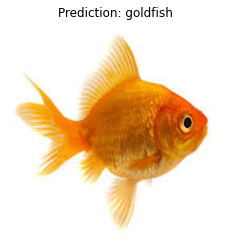

In [ ]:
plt.imshow(dog_image)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_=plt.title("Prediction: "+predicted_class_name)